# Regression과 Feature Selection 적용 성능 비교

## 보스턴 부동산 데이터의 특징들(Features)
1. CRIM: 도시별 범죄발생률
2. ZN: 25,000평을 넘는 토지의 비율
3. INDUS: 도시별 비상업 지구의 비유
4. CHAS: 찰스 강의 더미 변수(1 = 강의 경계, 0 = 나머지)
5. NOX: 일산화질소 농도
6. RM: 주거할 수 있는 평균 방의개수
7. AGE: 1940년 이전에 지어진 주택의 비율
8. DIS: 5개의 고용지원센터까지의 가중치가 고려된 거리
9. RAD: 고속도로의 접근 용이성에 대한 지표
10. TAX: 10,000달러당 재산세 비율
11. PTRATIO: 도시별 교사와 학생의 비율 
12. B: 도시의 흑인 거주 비유
13. LSTAT: 저소득층의 비율

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston              # 내장 데이터셋 로딩
from sklearn.linear_model import LinearRegression     # 선형회귀 모델
from sklearn.model_selection import train_test_split  # 학습 데이터와 테스트 데이터 분할
from sklearn.metrics import mean_squared_error        # 제곱평균 에러 구하는 함수
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston_house_data = load_boston()

In [3]:
boston_house_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston_house_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston_house_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# feature_names 출력
boston_house_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 전체 특징(Feature)를 사용한 Linear Regression

In [7]:
# X, y 데이터 분리 해서 대입
X = boston_house_data.data
y = boston_house_data.target

In [8]:
type(X)

numpy.ndarray

In [9]:
from sklearn.model_selection import KFold

num_split = 5
# n_splits : validation split 갯수
# 매개변수 : shuffle = True, random_state = 40 
kf = KFold(n_splits=num_split)  

tot_MSE = 0.0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 선형회귀(Linear Regression) 모델 객체 선언하기
    model_lr = LinearRegression()

    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측을 수행하기
    y_pred = model_lr.predict(X_test)

    # MSE(Mean Squared Error) 합산
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred);

# 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

MSE : 37.13181
RMSE : 6.09359


In [10]:
print('절편 값 : ', model_lr.intercept_)
print('회귀 계수 : ', np.round(model_lr.coef_, 2))
#print('절편 값 : ', model_lr.coef_, 2)

절편 값 :  30.183480140978528
회귀 계수 :  [ -0.19   0.04   0.05   1.89 -14.95   4.76   0.    -1.3    0.46  -0.02
  -0.81  -0.    -0.53]


In [11]:
# 피처별 회귀 계수 값 확인
coff = pd.Series(data=np.round(model_lr.coef_,1), index=boston_house_data.feature_names)
coff.sort_values(ascending=False)

RM          4.8
CHAS        1.9
RAD         0.5
INDUS       0.1
ZN          0.0
AGE         0.0
TAX        -0.0
B          -0.0
CRIM       -0.2
LSTAT      -0.5
PTRATIO    -0.8
DIS        -1.3
NOX       -14.9
dtype: float64

## Feature Selection - 상관분석(Correlation Analysis)

In [12]:
# 아래와 같이 출력되도록 boston_house dataframe을 만드세요.
df_boston_house = pd.DataFrame(X, columns=boston_house_data.feature_names)

In [13]:
df_boston_house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
df_boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
df_boston_house['PRICE'] = y
df_boston_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


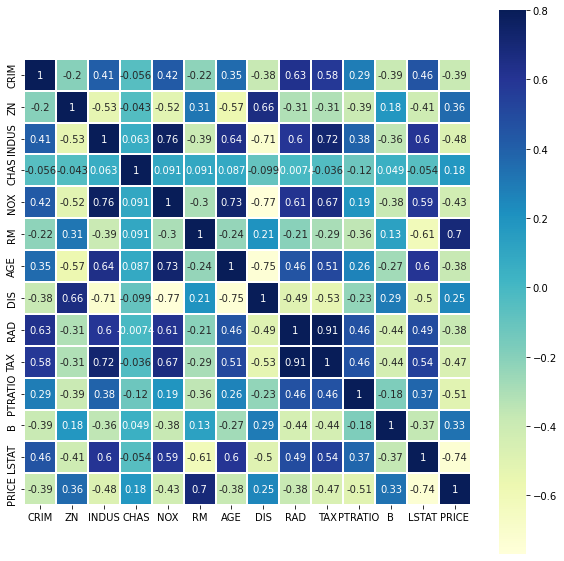

In [16]:
# 피처간의 상관계수를 heatmap으로 시각화 해 보세요.
# title은 'Feature Correlation'

corr = df_boston_house.corr() # correlation 메소드 호출
plt.figure(figsize=(10, 10));
sns.heatmap(corr, vmax=0.8, linewidths=0.01,square=True,  annot=True, cmap='YlGnBu');

plt.show()

In [17]:
corr.PRICE<0.5

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX         True
RM         False
AGE         True
DIS         True
RAD         True
TAX         True
PTRATIO     True
B           True
LSTAT       True
PRICE      False
Name: PRICE, dtype: bool

In [18]:
# price와 feature 간의 관계를 regplot()으로 시각화 하기 위한 준비

# corr 에서 price > 0.5 거나 price < -0.5작은 feature list 추출
useful_feature_list = corr[(corr.PRICE>0.5) | (corr.PRICE<-0.5)]

# features X를 위해 useful_feature_list 리스트에서 'PRICE' 제거
# useful_feature_list.drop('PRICE', inplace=True)
useful_feature_list.drop('PRICE',axis=0, inplace=True)

full_column_list = boston_house_data.feature_names

In [19]:
useful_feature_list

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663


In [20]:
len(full_column_list)

13

In [21]:
df_boston_house[full_column_list]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Figure(432x288) [[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]
AxesSubplot(0.125,0.657941;0.133621x0.222059)
AxesSubplot(0.285345,0.657941;0.133621x0.222059)
AxesSubplot(0.44569,0.657941;0.133621x0.222059)
AxesSubplot(0.606034,0.657941;0.133621x0.222059)
AxesSubplot(0.766379,0.657941;0.133621x0.222059)
AxesSubplot(0.125,0.391471;0.133621x0.222059)
AxesSubplot(0.285345,0.391471;0.133621x0.222059)
AxesSubplot(0.44569,0.391471;0.133621x0.222059)
AxesSubplot(0.606034,0.391471;0.133621x0.222059)
AxesSubplot(0.766379,0.391471;0.133621x0.222059)
AxesSubplot(0.125,0.125;0.133621x0.222059)
AxesSubplot(0.285345,0.125;0.133621x0.222059)
AxesSubplot(0.44569,0.125;0.133621x0.222059)


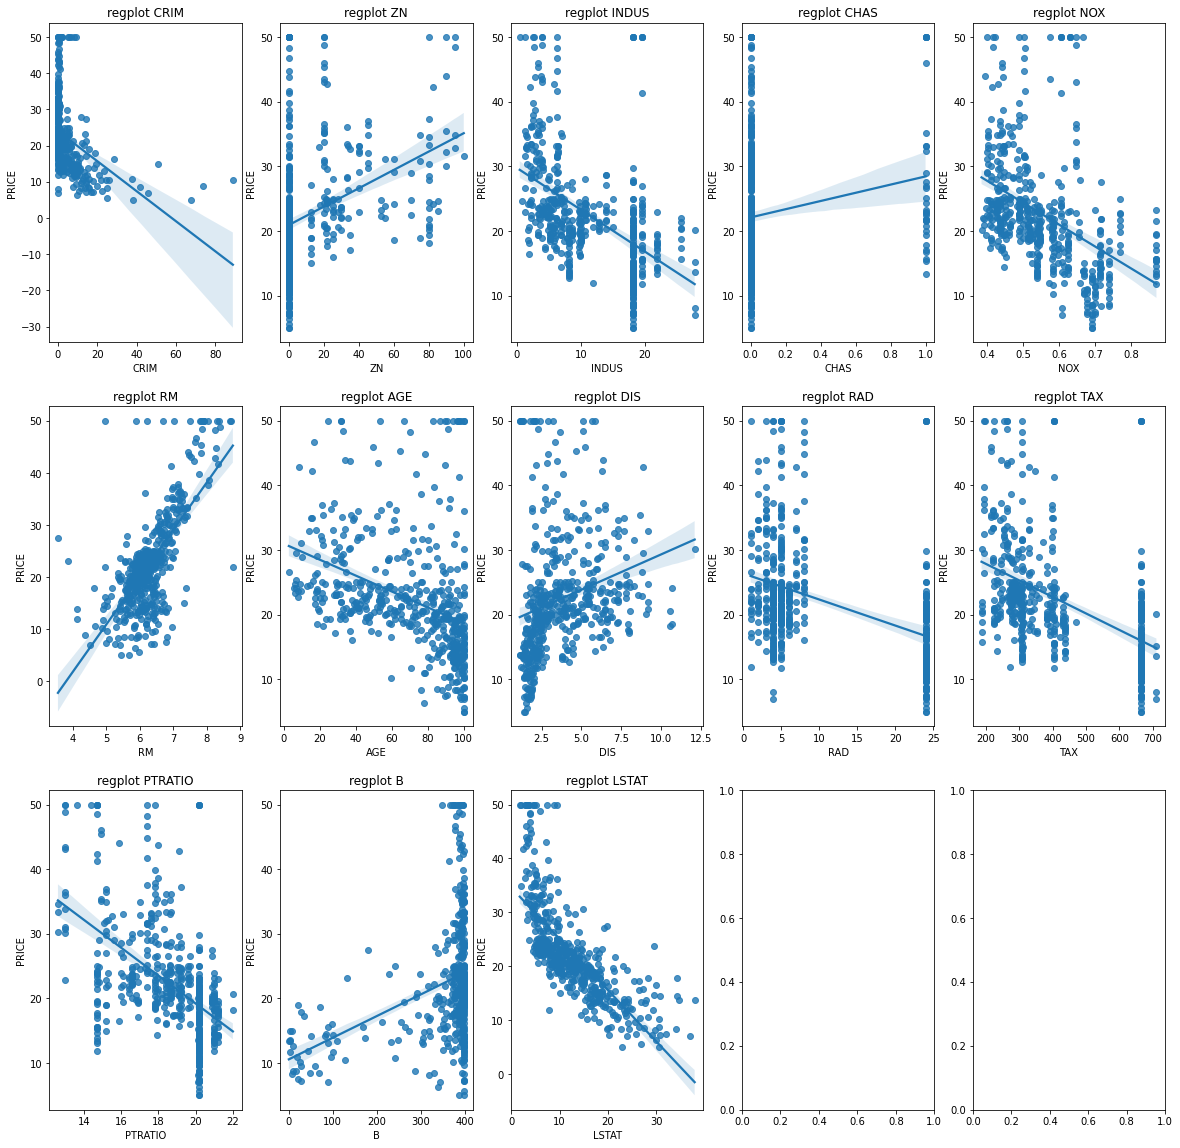

In [22]:
# 3x5 fig로 각 fearture와 price 간의 상관관계를 보기 위한
# regression plot 그리기
figure, ax_list = plt.subplots(nrows=3, ncols=5)
print(figure, ax_list)
figure.set_size_inches(20,20) 
for i in range(len(full_column_list)): 
  print(ax_list[int(i/5)][int(i%5)])
  sns.regplot(data=df_boston_house, x=full_column_list[i], y='PRICE', ax=ax_list[int(i/5)][int(i%5)]) 
  ax_list[int(i/5)][int(i%5)].set_title("regplot " + full_column_list[i])

## 유의미한 Feature들만을 남기는 Feature Selection

In [23]:
print(type(corr))
corr

<class 'pandas.core.frame.DataFrame'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [24]:
# price > 0.5 거나 price < -0.5작은 feature list 추출
useful_feature_list = corr.query("PRICE > 0.5 or PRICE < -0.5").index.values.tolist()
useful_feature_list.remove('PRICE')
print(useful_feature_list)

['RM', 'PTRATIO', 'LSTAT']


In [25]:
X = df_boston_house.loc[:,useful_feature_list].values
y = df_boston_house.iloc[:,-1].values

In [26]:
print(X.shape)
print(y.shape)

(506, 3)
(506,)


In [27]:
# 제거된 컬럼 확인해 봄
removed_column_list = list(set(full_column_list) - set(useful_feature_list))
print(removed_column_list)

['ZN', 'B', 'CRIM', 'DIS', 'TAX', 'CHAS', 'AGE', 'INDUS', 'NOX', 'RAD']


In [28]:
X

array([[ 6.575, 15.3  ,  4.98 ],
       [ 6.421, 17.8  ,  9.14 ],
       [ 7.185, 17.8  ,  4.03 ],
       ...,
       [ 6.976, 21.   ,  5.64 ],
       [ 6.794, 21.   ,  6.48 ],
       [ 6.03 , 21.   ,  7.88 ]])

In [29]:
X.shape

(506, 3)

In [30]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [31]:
num_split = 10
# n_splits : validation split 갯수
# 매개변수 : shuffle = True, random_state = 40 
# kf = KFold(n_splits=num_split, shuffle=False)
kf = KFold(n_splits=num_split, shuffle=True, random_state=40)

tot_MSE = 0.0
model_lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 선형회귀(Linear Regression) 모델 선언하기

    # 선형회귀(Linear Regression) 모델 학습하기
    model_lr.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측을 수행함
    y_pred = model_lr.predict(X_test)

    # MSE(Mean Squared Error) 합산 수행
    tot_MSE = tot_MSE + mean_squared_error(y_test, y_pred)

# 평균 MSE 계산 (total_MSE / KF-split갯수)
MSE = tot_MSE / num_split
RMSE = np.sqrt(MSE)
print('MSE : {0:.5f}'.format(MSE))
print('RMSE : {0:.5f}'.format(RMSE))

MSE : 27.69053
RMSE : 5.26218


보스턴 집값 예측을 Linear Regression 모델로 실습해 봄
- 피처엔지니어링이 성능향상에 영향을 줬다는 것을 알 수 있음.
- k-fold 교차검증 수행
- corr feature selection의 상관관계분석 활용

## [참고] K-Fold 교차검증 :  cross_val_score()  함수 사용
- cross_val_score(estimator, X, y, socring="neg_mean_squared_error", cv={default 5})
- soring="neg_mean_squared_error"를 지정하면 MSE의 음수값이 반환됨. 따라서 -1을 곱해주면 MSE 양수값을 얻을 수있음.

In [32]:
from sklearn.model_selection import cross_val_score   # KF 검증 함수

model_lr = LinearRegression()

neg_mse_scores = cross_val_score(model_lr, X, y, scoring="neg_mean_squared_error", cv=kf,n_jobs=8,verbose=2)
mse = (-1 * neg_mse_scores).mean()
rmse = np.sqrt(mse) #np.sqrt() : Square Root 계산

# cross_val_score(scoring="neg_mean_squared_err")로 반환된 값은 모두 음수임
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 평균 MSE : ', np.round(mse, 5))
print('5 folds의 평균 RMSE : {0:.5f}'.format(rmse))


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s[CV] END .................................................... total time=   0.0s

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
5 folds의 개별 Negative MSE scores:  [-59.88 -23.36 -29.63 -31.24 -17.22 -17.08 -38.29 -10.91 -19.9  -29.42]
5 folds의 평균 MSE :  27.69053
5 folds의 평균 RMSE : 5.26218


[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.6s finished


In [33]:
neg_mse_scores

array([-59.87516614, -23.35771941, -29.63022814, -31.23613268,
       -17.22136017, -17.07532858, -38.28557993, -10.90909024,
       -19.89547278, -29.41925743])

## [문제] 기본 LinearRegression 모델을 수행하여 MSE, RMSE 결과를 비교해 보세요.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train 데이터와 test 데이터 분리 : train_test_split() 사용
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25 ,shuffle=True, random_state =40)

# 선형 회귀 학습 수행
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 예측 수행
y_pred = model_lr.predict(X_test)

# MSE, RMSE 계산
MSE = mean_squared_error(y_test,y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 다음과 같이 출력되게 되게 해주세요.

MSE : 39.00147140362387
RMSE : 6.245115803860155


In [35]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.utils import one
model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)
# 예측 수행
y_pred = model_rf.predict(X_test)

# MSE, RMSE 계산
MSE = mean_squared_error(y_test,y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)


MSE : 23.870952165354318
RMSE : 4.885790843390077
